In [20]:
import os
import pandas as pd
from PIL import Image

df = pd.read_csv('/media/zac/12TB Drive/covid-detector/unpacked_data/train_image_level.csv')
df['id'] = df.applymap(lambda x: str(x).replace("_image", ".jpg"))

source_folder = '/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/'
file_list = os.listdir(source_folder)
file_list = [single_file.replace("~", "") for single_file in file_list]

In [10]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

                    id boxes           label StudyInstanceUID
1     000c3a3f293f.jpg   NaN  none 1 0 0 1 1     ff0879eb20ed
6     0023f02ae886.jpg   NaN  none 1 0 0 1 1     2fa400b873f5
22    00c1515729a8.jpg   NaN  none 1 0 0 1 1     1a58b43cf286
24    00e3a7e91a34.jpg   NaN  none 1 0 0 1 1     74ba8f2badcb
26    010214f9b600.jpg   NaN  none 1 0 0 1 1     2a7b4e669dda
...                ...   ...             ...              ...
6322  ff7659762b75.jpg   NaN  none 1 0 0 1 1     4aa11ef1fd38
6324  ff9f10a24c27.jpg   NaN  none 1 0 0 1 1     a937614104e3
6325  ffa9fef3c7bf.jpg   NaN  none 1 0 0 1 1     5133bbb7b75c
6329  ffcc6edd9445.jpg   NaN  none 1 0 0 1 1     7e6c68462e06
6330  ffd91a2c4ca0.jpg   NaN  none 1 0 0 1 1     8332bdaddb6e

[2040 rows x 4 columns]


In [ ]:
box_list = df['boxes'].to_list()


In [25]:
num_boxes = 0
import json


have_photos = 0
have_boxes = 0
dont_photos = 0
no_boxes = 0
df_len = 0

destination_folder = '/media/zac/12TB Drive/covid-detector/extracted_images/resized_jpgs/'
parsed_df = pd.DataFrame(columns = ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'class_name'])

for index, row in df.iterrows():
    df_len = df_len + 1
    if row['id'] in file_list:
        photo_name = row['id']
        have_photos = have_photos + 1
        # print("Have photo", row['id'])
        boxes = None
        if not isinstance(row['boxes'], str):
            boxes = "[]"
        else:
            boxes = list(eval(row['boxes']))

        image_name = source_folder + row['id']
        img = Image.open(image_name)

        img_height = img.height
        img_width = img.width

        desired_height = 600
        desired_width = 600

        height_downscale = img_height / desired_height
        width_downscale = img_width / desired_width

        img = img.resize((desired_width, desired_height))

        image_with_path = destination_folder + photo_name
        img.save(image_with_path)

        for box in boxes:
            if isinstance(box, str):
                no_boxes = no_boxes + 1
                parsed_df = parsed_df.append({'image_name':image_name, 'x_min':"",
                        'y_min':"", 'x_max':"", 'y_max':"",
                        'class_name':""},  ignore_index=True)
            else:
                have_boxes = have_boxes + 1
                x_min = int(box['x'] / width_downscale)
                y_min = int(box['y'] / height_downscale)
                x_max = int((box['x'] + box['width']) / width_downscale)
                y_max = int((box['y'] + box['height'])  / height_downscale)
                class_name = 'opacity'

                parsed_df = parsed_df.append({'image_name':image_name, 'x_min':int(x_min),
                                  'y_min':int(y_min), 'x_max':int(x_max), 'y_max':int(y_max),
                                  'class_name':class_name},  ignore_index=True)

    else:
        dont_photos = dont_photos + 1
        # print("Don't have photo for", row['id'])

In [26]:
print(parsed_df.head())

                                          image_name x_min y_min x_max y_max  \
0  /media/zac/12TB Drive/covid-detector/extracted...   109   224   235   461   
1  /media/zac/12TB Drive/covid-detector/extracted...   453   214   570   454   
2  /media/zac/12TB Drive/covid-detector/extracted...   444   285   584   490   
3  /media/zac/12TB Drive/covid-detector/extracted...    91   348   269   495   
4  /media/zac/12TB Drive/covid-detector/extracted...    96   117   238   496   

  class_name  
0    opacity  
1    opacity  
2    opacity  
3    opacity  
4    opacity  


In [27]:
parsed_df.to_csv('/media/zac/12TB Drive/covid-detector/meta/parsed_df.csv')


In [ ]:
#     image_name = row['image_location'].replace(".png", ".jpg")
#     img = Image.open(image_name)
#
#     img_height = img.height
#     img_width = img.width
#
#     desired_height = 600
#     desired_width = 600
#
#     height_downscale = img_height / desired_height
#     width_downscale = img_width / desired_width
#
#     img = img.resize((desired_width, desired_height))
#
#     base_name = os.path.basename(image_name)
#     image_name = image_folder + base_name
#     img.save(image_name)
#
#     if len(row['boxes']) > 0:
#         for box in row['boxes']:
#             x_min = int(box['x'] / width_downscale)
#             y_min = int(box['y'] / height_downscale)
#             x_max = int((box['x'] + box['width']) / width_downscale)
#             y_max = int((box['y'] + box['height'])  / height_downscale)
#             class_name = 'opacity'
#             parsed_df = parsed_df.append({'image_name':image_name, 'x_min':int(x_min),
#                               'y_min':int(y_min), 'x_max':int(x_max), 'y_max':int(y_max),
#                               'class_name':class_name},  ignore_index=True)
#     else:
#         parsed_df = parsed_df.append({'image_name':image_name, 'x_min':"",
#                         'y_min':"", 'x_max':"", 'y_max':"",
#                         'class_name':""},  ignore_index=True)
#
# print(parsed_df.head())

In [5]:
print(file_list[0])

001bd15d1891.jpg~


In [ ]:
#!rm -rf ./siim-covid19-detection/

In [9]:
%pip install pylibjpeg pylibjpeg-libjpeg pydicom
%pip install python-gdcm
%pip install tensorflow
%pip install pandas
%pip install Pillow
%pip install matplotlib
%pip install keras
%pip install scikit-learn
%pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
# !pip uninstall numpy
# !pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 24.9 MB 2.6 MB/s eta 0:00:01     |███████████████████████▍        | 18.2 MB 2.6 MB/s eta 0:00:03
     |████████████████████████████████| 303 kB 5.0 MB/s eta 0:00:01
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 2041.3 MB 5.1 kB/s  eta 0:00:01    |██▎                             | 143.1 MB 15.2 MB/s eta 0:02:

In [5]:
# %pip install kaggle
# from google.colab import files
# files.upload()
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle -v
# !mkdir siim-covid19-detection
# !kaggle competitions download siim-covid19-detection -p ./siim-covid19-detection/

In [2]:
# !rm  -rf ./siim-covid19-detection/*.dcm
# !mkdir ./siim-covid19-detection/dcm_files/
# !mkdir ./siim-covid19-detection/extracted_images/
# !unzip ./siim-covid19-detection/train_image_level.csv.zip -d ./siim-covid19-detection/
# !rm ./siim-covid19-detection/train_image_level.csv.zip
# !unzip ./siim-covid19-detection/'*.zip' -d ./siim-covid19-detection/dcm_files/
# !rm ./siim-covid19-detection/*.zip

mkdir: cannot create directory ‘./siim-covid19-detection/dcm_files/’: No such file or directory
mkdir: cannot create directory ‘./siim-covid19-detection/extracted_images/’: No such file or directory
unzip:  cannot find or open ./siim-covid19-detection/train_image_level.csv.zip, ./siim-covid19-detection/train_image_level.csv.zip.zip or ./siim-covid19-detection/train_image_level.csv.zip.ZIP.
rm: cannot remove './siim-covid19-detection/train_image_level.csv.zip': No such file or directory
unzip:  cannot find or open ./siim-covid19-detection/*.zip, ./siim-covid19-detection/*.zip.zip or ./siim-covid19-detection/*.zip.ZIP.

No zipfiles found.
rm: cannot remove './siim-covid19-detection/*.zip': No such file or directory


In [10]:
!nvidia-smi

Mon Jun 21 23:21:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   45C    P8    13W / 245W |    449MiB /  7979MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 16.28 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [12]:
!pip install --upgrade keras

In [13]:
%cd keras-retinanet/

!pip install .

/home/zac/covid-detector/keras-retinanet
Processing /home/zac/covid-detector/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Using cached Cython-0.29.23-cp38-cp38-manylinux1_x86_64.whl (1.9 MB)
     |████████████████████████████████| 51.0 MB 75 kB/s  eta 0:00:01
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp38-cp38-linux_x86_64.whl size=181437 sha256=9a49664b875bc9c25c4e9424697f0cacd5355936ac7b49dd36d3ee150fdf0230
  Stored in directory: /home/zac/.cache/pip/wheels/1f/57/23/404a27c88c950f2e8176282de879a1f01b1a14484c0df6c758
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.wh

In [16]:
%pwd

'/home/zac/covid-detector'

In [15]:
!python setup.py build_ext --inplace

%cd ~/covid-detector/

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/home/zac/covid-detector/venv/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/zac/covid-detector/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/keras_retinanet
creating build/temp.linux-x86_64-3.8/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/home/zac/covid-detector/venv/include -I/usr/in

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file
import os
from PIL import Image, ImageEnhance
import random
import numpy as np
import json
import matplotlib.image as mpimg

import tensorflow as tf
# from tensorflow import pow, log, abs, cumsum, reduce_sum, greater, reduce_mean
#
# from keras.layers.advanced_activations import LeakyReLU
# from keras.layers import ReLU, UpSampling2D, Add, Input, Activation
# from keras.layers import Convolution2D, LSTM, MaxPooling2D, BatchNormalization, Flatten, Dense
# from keras.layers import Dropout, Conv2D, MaxPool2D, ZeroPadding2D
# from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint
# from keras.metrics import RootMeanSquaredError
# from keras.optimizers import Adam, RMSprop
import pylibjpeg
import sys
from PIL import Image

In [ ]:
# get training data
pd.set_option('display.max_columns', None)
df = pd.read_csv('./siim-covid19-detection/train_image_level.csv')
df = df.dropna()

In [ ]:
# some helper functions
def get_dicom_images(folder_name):
    dcm_filelist = []
    for path, subdirs, files in os.walk(folder_name):
        for name in files:
            if name.endswith(".dcm"):
                dcm_filelist.append(os.path.join(path, name))
    return dcm_filelist

def find_dicom_path(image_arr, id_arr):
    output_array = []
    for id in id_arr:
        id = id.replace("_image", "")
        img_path = ""
        for entry in image_arr:
            if entry.endswith(id + ".dcm"):
                img_path = entry
                continue
        output_array.append(img_path)
    return output_array

def parse_box_data(box_list):
    box_output = []
    for box_dict in box_list:
        box_dict = box_dict.replace("'", '"')
        boxes_json = json.loads(box_dict)
        box_output.append(boxes_json)
    return box_output

In [ ]:
boxes_json = parse_box_data(df['boxes'])
df['boxes'] = boxes_json

for item in boxes_json:
    print("Type:", type(item), "for item:", item)
    break

In [ ]:
# Convert dicom images to pngs
dicom_image_list = get_dicom_images("/content/")

def convert_dcm_dir(dcm_dir):
    img_list = []
    for filename in dcm_dir:
        try:
            ds1 = dcmread(filename)
            img_to_save = ds1.pixel_array
            base_file =  os.path.basename(filename)
            file_path = os.path.dirname(filename).replace("dcm_files", "extracted_images/")
            img_filename = file_path + base_file.replace(".dcm", ".png")
            
            array_buffer = img_to_save.tobytes()
            img = Image.new("I", img_to_save.T.shape)
            img.frombytes(array_buffer, 'raw', "I;16")
            img.save(img_filename)
            img_list.append(img_filename)

            # Could also save othehr data and pick it up later
        except ValueError:
            try:
                print("Value Error on", filename, "but trying to continue:", sys.exc_info()[0])
                img = Image.fromarray(img_to_save)
                img.save(img_filename)
                img_list.append(img_filename)
            except:
                print("Still couldn't open/process dcm:", sys.exc_info()[0])
                raise
        except:
            print("Couldn't open/process dcm:", sys.exc_info()[0])
            raise
    return img_list

def attach_image_paths(image_ids, img_files):
    img_data = []
    for id in image_ids:
        file_loc = ""
        id = id.replace("_image", "")
        for img_file in img_files:
            if id in img_file:
                file_loc = img_file
        img_data.append(file_loc)
    return img_data


def attach_images(image_paths):
    image_data = []
    for index, image in enumerate(image_paths):
        if ".png" in image:
            #img = mpimg.imread(image)
            img = Image.open(image)
            image_data.append(np.array(img))
            #image_data.append(img)
        else:
            image_data.append(np.ones((1,1)))
    return image_data

In [ ]:
img_list = convert_dcm_dir(dicom_image_list)

In [ ]:
df['image_location'] = attach_image_paths(df['id'], img_list)
df = df[df['image_location'] != ""]

In [ ]:
image_data = attach_images(df['image_location'])
df['image_data'] = image_data

In [ ]:
print(df.head())

In [ ]:
df.head()

In [ ]:
!apt install imagemagick
!mogrify -format jpg ./siim-covid19-detection/extracted_images/*.png

In [ ]:
!mkdir ./train/

parsed_df = pd.DataFrame(columns = ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'class_name'])

image_folder = "./train/"
for index, row in df.iterrows():
    image_name = row['image_location'].replace(".png", ".jpg")
    img = Image.open(image_name)

    img_height = img.height
    img_width = img.width

    desired_height = 600
    desired_width = 600

    height_downscale = img_height / desired_height
    width_downscale = img_width / desired_width

    img = img.resize((desired_width, desired_height))

    base_name = os.path.basename(image_name)
    image_name = image_folder + base_name
    img.save(image_name)

    if len(row['boxes']) > 0:
        for box in row['boxes']:
            x_min = int(box['x'] / width_downscale)
            y_min = int(box['y'] / height_downscale)
            x_max = int((box['x'] + box['width']) / width_downscale)
            y_max = int((box['y'] + box['height'])  / height_downscale)
            class_name = 'opacity'
            parsed_df = parsed_df.append({'image_name':image_name, 'x_min':int(x_min), 
                              'y_min':int(y_min), 'x_max':int(x_max), 'y_max':int(y_max), 
                              'class_name':class_name},  ignore_index=True)
    else:
        parsed_df = parsed_df.append({'image_name':image_name, 'x_min':"", 
                        'y_min':"", 'x_max':"", 'y_max':"", 
                        'class_name':""},  ignore_index=True)

print(parsed_df.head())

In [9]:
from matplotlib.patches import Rectangle
def show_image_objects(image_name, image_row):

    plt.imshow(Image.open(image_name))

    # Add the patch to the Axes
    plt.gca().add_patch(Rectangle((image_row['x_min'],image_row['y_min']),
                        image_row['x_max'] - image_row['x_min'],
                        image_row['y_max'] - image_row['y_min'],
                        linewidth=1,edgecolor='r',facecolor='none'))

    print("Real box:", image_row['x_min'],image_row['y_min'],
          (image_row['x_max'] - image_row['x_min']),
          (image_row['y_max'] - image_row['y_min']))
    plt.show()

In [ ]:
for index, row in parsed_df.iterrows():
    show_image_objects(row)

In [28]:
from sklearn.model_selection import GroupShuffleSplit

train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, random_state = 42).split(parsed_df, groups=parsed_df['image_name']))

train_df = parsed_df.iloc[train_inds]
test_df = parsed_df.iloc[test_inds]


In [29]:
ANNOTATIONS_FILE = '/media/zac/12TB Drive/covid-detector/meta/annotations.csv'
CLASSES_FILE = '/media/zac/12TB Drive/covid-detector/meta/classes.csv'
VALIDATION_FILE = '/media/zac/12TB Drive/covid-detector/meta/validation.csv'

train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)
test_df.to_csv(VALIDATION_FILE, index=False, header=None)

classes = set(['opacity'])

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [31]:
!head "/media/zac/12TB Drive/covid-detector/meta/classes.csv"

opacity,0


In [32]:
!head -n 25 '/media/zac/12TB Drive/covid-detector/meta/annotations.csv'

/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/001bd15d1891.jpg,109,224,235,461,opacity
/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/001bd15d1891.jpg,453,214,570,454,opacity
/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/007cf31356c6.jpg,444,285,584,490,opacity
/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/007cf31356c6.jpg,91,348,269,495,opacity
/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/00b0891276a3.jpg,96,117,238,496,opacity
/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/00b0891276a3.jpg,331,117,495,463,opacity
/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/00b8180bd3a8.jpg,36,303,246,461,opacity
/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/00b8180bd3a8.jpg,383,327,543,492,opacity
/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/010433f32857.jpg,,,,,
/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/010433f32857.jpg,,,,,
/media/zac/12TB Drive/covid-detector/extr

In [ ]:
!git clone https://github.com/yhenon/pytorch-retinanet.git

In [ ]:
!head ./validation.csv

In [ ]:
#%cd /content/keras-retinanet/
%cd /content/
!cp -rf ./pytorch-retinanet/retinanet/ ./
#!python setup.py build_ext --inplace

/content


In [3]:
import collections

import numpy as np

import torch
import torch.optim as optim
from torchvision import transforms

from retinanet import model
from retinanet.dataloader import CocoDataset, CSVDataset, collater, Resizer, AspectRatioBasedSampler, Augmenter, \
    Normalizer
from torch.utils.data import DataLoader
import gc

gc.collect()
torch.cuda.empty_cache()
from retinanet import coco_eval
from retinanet import csv_eval

!mkdir ./checkpoints/

dataset_train = CSVDataset(train_file="/media/zac/12TB Drive/covid-detector/meta/annotations_converted.csv",
                           class_list="/media/zac/12TB Drive/covid-detector/meta/classes.csv",
                           transform=transforms.Compose([Normalizer(), Augmenter(), Resizer()]))

sampler = AspectRatioBasedSampler(dataset_train, batch_size=2, drop_last=False)
dataloader_train = DataLoader(dataset_train, num_workers=3, collate_fn=collater, batch_sampler=sampler)

retinanet = model.resnet50(num_classes=dataset_train.num_classes(), pretrained=True)
retinanet = retinanet.cuda()
retinanet = torch.nn.DataParallel(retinanet).cuda()
retinanet.training = True
optimizer = optim.Adam(retinanet.parameters(), lr=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)
loss_hist = collections.deque(maxlen=500)
retinanet.train()
retinanet.module.freeze_bn()

for epoch_num in range(10):
    retinanet.train()
    retinanet.module.freeze_bn()

    epoch_loss = []

    for iter_num, data in enumerate(dataloader_train):
        try:
            optimizer.zero_grad()

            if torch.cuda.is_available():
                classification_loss, regression_loss = retinanet([data['img'].cuda().float(), data['annot']])
            else:
                classification_loss, regression_loss = retinanet([data['img'].float(), data['annot']])
                
            classification_loss = classification_loss.mean()
            regression_loss = regression_loss.mean()

            loss = classification_loss + regression_loss

            if bool(loss == 0):
                continue

            loss.backward()

            torch.nn.utils.clip_grad_norm_(retinanet.parameters(), 0.1)

            optimizer.step()

            loss_hist.append(float(loss))

            epoch_loss.append(float(loss))

            print(
                'Epoch: {} | Iteration: {} | Classification loss: {:1.5f} | Regression loss: {:1.5f} | Running loss: {:1.5f}'.format(
                    epoch_num, iter_num, float(classification_loss), float(regression_loss), np.mean(loss_hist)))

            del classification_loss
            del regression_loss
        except Exception as e:
            print(e)
            continue

    scheduler.step(np.mean(epoch_loss))

    torch.save(retinanet.module, './checkpoints/{}_retinanet_{}.pt'.format("csv", epoch_num))

retinanet.eval()

torch.save(retinanet, 'model_finalv2.pt')
torch.save(retinanet.state_dict(), 'model_finalv2.pth')

mkdir: cannot create directory ‘./checkpoints/’: File exists
Epoch: 0 | Iteration: 0 | Classification loss: 0.59354 | Regression loss: 0.48714 | Running loss: 1.08069
Epoch: 0 | Iteration: 1 | Classification loss: 1.12484 | Regression loss: 1.03417 | Running loss: 1.61985
Epoch: 0 | Iteration: 2 | Classification loss: 1.11883 | Regression loss: 1.05298 | Running loss: 1.80383
Epoch: 0 | Iteration: 3 | Classification loss: 1.10085 | Regression loss: 0.99241 | Running loss: 1.87619
Epoch: 0 | Iteration: 4 | Classification loss: 1.06979 | Regression loss: 1.00772 | Running loss: 1.91645
Epoch: 0 | Iteration: 5 | Classification loss: 1.07220 | Regression loss: 1.00762 | Running loss: 1.94368
Epoch: 0 | Iteration: 6 | Classification loss: 0.12814 | Regression loss: 0.00000 | Running loss: 1.68432
Epoch: 0 | Iteration: 7 | Classification loss: 0.96765 | Regression loss: 0.83443 | Running loss: 1.69904
Epoch: 0 | Iteration: 8 | Classification loss: 1.01764 | Regression loss: 1.06445 | Running

In [4]:
print("training is done")
#!python ./pytorch-retinanet/train.py --dataset csv --csv_train ./annotations.csv  --csv_classes ./classes.csv --csv_val ./validation.csv
#!python ./pytorch-retinanet/train.py --dataset csv --csv_train ./annotations.csv  --csv_classes ./classes.csv

training is done


In [ ]:
!mkdir ./test/

parsed_test_df = pd.DataFrame(columns = ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'class_name'])

image_folder = "./test/"
for index, row in df.iterrows():
    image_name = row['image_location'].replace(".png", ".jpg")
    img = Image.open(image_name)

    img_height = img.height
    img_width = img.width

    desired_height = 600
    desired_width = 600

    height_downscale = img_height / desired_height
    width_downscale = img_width / desired_width

    img = img.resize((desired_width, desired_height))

    base_name = os.path.basename(image_name)
    image_name = image_folder + base_name
    img.save(image_name)

    if len(row['boxes']) > 0:
        for box in row['boxes']:
            x_min = int(box['x'] / width_downscale)
            y_min = int(box['y'] / height_downscale)
            x_max = int((box['x'] + box['width']) / width_downscale)
            y_max = int((box['y'] + box['height'])  / height_downscale)
            class_name = 'opacity'
            parsed_test_df = parsed_test_df.append({'image_name':image_name, 'x_min':int(x_min), 
                              'y_min':int(y_min), 'x_max':int(x_max), 'y_max':int(y_max), 
                              'class_name':class_name},  ignore_index=True)
    else:
        parsed_test_df = parsed_test_df.append({'image_name':image_name, 'x_min':"", 
                        'y_min':"", 'x_max':"", 'y_max':"", 
                        'class_name':""},  ignore_index=True)

print(parsed_test_df.head())

                image_name x_min y_min x_max y_max class_name
0  ./test/09cf9767a7bf.jpg   312   111   417   337    opacity
1  ./test/09cf9767a7bf.jpg   119    40   218   176    opacity
2  ./test/09cf9767a7bf.jpg   104   249   200   348    opacity
3  ./test/12a2dfb55b6f.jpg   166   138   247   356    opacity
4  ./test/12a2dfb55b6f.jpg   479   194   544   367    opacity


In [ ]:
import torch
from retinanet import model
model = torch.load('./model_final.pt')
model.eval()

In [45]:
import cv2
import time
import torch
import pandas as pd
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


model = torch.load('./model_final.pt')
model.eval()
# parsed_df.to_csv('/media/zac/12TB Drive/covid-detector/meta/parsed_df.csv')
df2 = pd.read_csv('/media/zac/12TB Drive/covid-detector/unpacked_data/train_image_level.csv')

subset_folder = '/media/zac/12TB Drive/covid-detector/extracted_images/img_subset/'
for index, row in df2.iterrows():
    # row = '/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/001bd15d1891.jpg'
    img_names = subset_folder + row['id'].replace("_image", ".jpg")
    if os.path.isfile(img_names):
        print(img_names)
        run_img = Image.open(img_names).convert("RGB")
        image = cv2.imread(os.path.join(img_names))
        if image is None:
            continue
        image_orig = image.copy()

        rows, cols, cns = image.shape

        smallest_side = min(rows, cols)

        # rescale the image so the smallest side is min_side
        min_side = 600
        max_side = 600
        scale = min_side / smallest_side

        # check if the largest side is now greater than max_side, which can happen
        # when images have a large aspect ratio
        largest_side = max(rows, cols)

        if largest_side * scale > max_side:
            scale = max_side / largest_side

        # resize the image with the computed scale
        image = cv2.resize(image, (int(round(cols * scale)), int(round((rows * scale)))))
        rows, cols, cns = image.shape

        pad_w = 32 - rows % 32
        pad_h = 32 - cols % 32

        new_image = np.zeros((rows + pad_w, cols + pad_h, cns)).astype(np.float32)
        new_image[:rows, :cols, :] = image.astype(np.float32)
        image = new_image.astype(np.float32)
        image /= 255
        image -= [0.485, 0.456, 0.406]
        image /= [0.229, 0.224, 0.225]
        image = np.expand_dims(image, 0)
        image = np.transpose(image, (0, 3, 1, 2))

        with torch.no_grad():

            image = torch.from_numpy(image)
            if torch.cuda.is_available():
                image = image.cuda()

            st = time.time()

            out = model(image.cuda().float())
            # outputs (3, n) tensor
            # First row is confidence
            # Second row is classes
            # Thirds row is boxesw
            with open('./classes.csv') as f:
                labels = [line.strip() for line in f.readlines()]
            print(out)
            probabilities = out[0]
            boxes = out[1]

            print("realboxes", row['boxes'])
            print("scale", scale)
            print('probabilities', probabilities)
            print('boxes', boxes)
            print(len(probabilities))

            _, index = torch.max(probabilities, 0)
            percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
            # #
            # # Print the name along with score of the object identified by the model
            # #
            print(labels[index[0]], percentage[index[0]].item())
            # #
            # # Print the top 5 scores along with the image label. Sort function is invoked on the torch to sort the scores.
            # #
            _, indices = torch.sort(out, descending=True)
            top_5 = [(labels[idx], percentage[idx].item(), boxes[idx]) for idx in indices[0][:5]]

            print("top_5", top_5)

            if len(boxes) > 0:
                #print(boxes)
                plt.imshow(Image.open(img_names))

                # Add the patch to the Axes
                print("Boxes found", boxes)
                # plt.gca().add_patch(Rectangle(boxes[1],boxes[2],
                #                     boxes[3] - boxes[1],
                #                     boxes[4] - boxes[2],
                #                     linewidth=1,edgecolor='r',facecolor='none'))
                plt.show()

                show_image_objects(row['id'].replace("jpgs", "resized_jpgs"), row)



            # print(image.shape, image_orig.shape, scale)
            # scores, classification, transformed_anchors = model(image.cuda().float())
            # print("Scores:", scores)
            # print('Elapsed time: {}'.format(time.time() - st))
            # idxs = np.where(scores.cpu() > 0.5)
            # print(classification)
            # print(transformed_anchors)
            # boxes = transformed_anchors
            #
            #
            # # _, index = torch.max(out, 1)
            # percentage = torch.nn.functional.softmax(scores, dim=0)[0]
            # loc = scores.tolist().index(round(percentage.item(), 4))
            # print("loc", loc)
            # print('percentage', percentage)
            # print('boxes at loc', boxes[loc])
            # #
            # # Print the name along with score of the object identified by the model
            # #
            # labels = {0:'opacity'}
            # print(labels[index[0]], percentage[index[0]].item())
            #
            # Print the top 5 scores along with the image label. Sort function is invoked on the torch to sort the scores.
            #

            # _, indices = torch.sort(scores, descending=True)
            # [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]


            # for j in range(idxs[0].shape[0]):
            #     bbox = transformed_anchors[idxs[0][j], :]
            #
            #     x1 = int(bbox[0] / scale)
            #     y1 = int(bbox[1] / scale)
            #     x2 = int(bbox[2] / scale)
            #     y2 = int(bbox[3] / scale)
            #     #label_name = labels[int(classification[idxs[0][j]])]
            #     print(bbox, classification.shape)
            #     score = scores[j]
            #     #caption = '{} {:.3f}'.format(label_name, score)
            #     # draw_caption(img, (x1, y1, x2, y2), label_name)
            #     #draw_caption(image_orig, (x1, y1, x2, y2), caption)
            #     cv2.rectangle(image_orig, (x1, y1), (x2, y2), color=(0, 0, 255), thickness=2)
            #
            # cv2.imshow('detections', image_orig)
            # cv2.waitKey(0)

/media/zac/12TB Drive/covid-detector/extracted_images/img_subset/0a0bb7af0cab.jpg
[tensor([0.0815, 0.0705, 0.0659, 0.0659, 0.0637, 0.0628, 0.0620, 0.0616, 0.0596,
        0.0585, 0.0585, 0.0577, 0.0539, 0.0534, 0.0532, 0.0526, 0.0522, 0.0505],
       device='cuda:0'), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'), tensor([[ 90.9089,  25.6023, 126.8830,  97.9172],
        [ 96.4189,  40.5973, 119.3696,  82.4303],
        [ 96.2010,  60.6160, 120.7750,  91.0838],
        [ 17.3523,  30.0069,  39.6583,  76.6811],
        [ 86.5767,  22.6860, 115.5217,  79.6418],
        [ 99.6460,  44.7627, 129.7638, 102.6729],
        [102.8413,  32.6867, 126.4066,  78.3991],
        [ 21.7501,  37.9172,  45.6284,  83.2931],
        [102.0669,  52.1770, 127.6606,  86.0446],
        [ 78.4986,  26.7792, 106.8386,  83.7706],
        [ 71.4740,  25.9455,  94.5460,  69.2784],
        [ 90.0009,  48.5158, 112.7432,  85.8295],
        [ 95.2749,  19.9389, 119.4400,  65.1704],


AttributeError: 'list' object has no attribute 'softmax'

In [10]:
model = torch.load('./model_final.pt')
#for index, row in parsed_test_df.iterrows():
print("Starting test")
for index, row in parsed_df.iterrows():
    # row = '/media/zac/12TB Drive/covid-detector/extracted_images/jpgs/001bd15d1891.jpg'
    img_names = row['image_name'].replace("jpgs", "resized_jpgs")
    print(row['image_name'].replace("jpgs", "resized_jpgs"))
    run_img = Image.open(img_names).convert("RGB")
    preprocess = transforms.Compose([
        transforms.Resize(600),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])
    #
    # Pass the image for preprocessing and the image preprocessed
    #
    img_preprocessed = preprocess(run_img)
    #
    # Reshape, crop, and normalize the input tensor for feeding into network for evaluation
    #
    batch_img_tensor = torch.unsqueeze(img_preprocessed, 0)
    out = model(batch_img_tensor)
    # outputs (3, n) tensor
    # First row is confidence
    # Second row is classes
    # Thirds row is boxesw
    with open('./classes.csv') as f:
        labels = [line.strip() for line in f.readlines()]
    print(out)
    probabilities = out[0]
    boxes = out[1]


    # print(probabilities)
    # print(boxes)
    # print(len(probabilities))

    # _, index = torch.max(out, 1)
    # percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    # #
    # # Print the name along with score of the object identified by the model
    # #
    # print(labels[index[0]], percentage[index[0]].item())
    # #
    # # Print the top 5 scores along with the image label. Sort function is invoked on the torch to sort the scores.
    # #
    # _, indices = torch.sort(out, descending=True)
    # [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

    if len(boxes) > 0:
        print(boxes)
        plt.imshow(Image.open(row['image_name'].replace("jpgs", "resized_jpgs")))

        # Add the patch to the Axes
        plt.gca().add_patch(Rectangle((boxes[1],boxes[2]),
                            boxes[3] - boxes[1],
                            boxes[4] - boxes[2],
                            linewidth=1,edgecolor='r',facecolor='none'))
        plt.show()

        if row['x_min']:
            show_image_objects(row['image_name'].replace("jpgs", "resized_jpgs"), row)

Starting test


NameError: name 'parsed_df' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Scratch After This

In [ ]:
!ls -al /content/keras-retinanet/

In [ ]:
#!wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=12abFXy7-FOwoKxFSJ__IbOGm9oQDU7CQ' -O models.tar.gz
#!wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1rI_WSlot6ZNa_ERdLSCsGquUXEK_ikYb' -O pretrained.tar.gz

In [ ]:
#!mv pretrained.tar.gz pretrained.zip
#!unzip pretrained.zip -d ./pretrained_models/

In [ ]:
def train_model(trainX, testX, trainY, testY):
    
    baseModel = VGG16(weights="imagenet", include_top=False,
                    input_tensor=Input(shape=(224, 224, 3)))

    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(64, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(3, activation="softmax")(headModel)
    # place the head FC model on top of the base model (this will become
    # the actual model we will train)
    model = Model(inputs=baseModel.input, outputs=headModel)
    # loop over all layers in the base model and freeze them so they will
    # *not* be updated during the first training process
    for layer in baseModel.layers:
        layer.trainable = False
    # compile our model
    print("[INFO] compiling model...")
    opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
                    metrics=["accuracy"])

    model.fit(interleaved_train,
          steps_per_epoch = steps_per_epoch,
          epochs = NUM_EPOCHS,
          verbose = 1,
          validation_data = interleaved_val,
          validation_steps = validation_steps,
          callbacks = callbacks)

In [ ]:
# based of the data generators used for facial keypoint detection here:
# https://github.com/ethanyanjiali/deep-vision/tree/master/Hourglass/tensorflow
class val_generator(keras.utils.Sequence):
    def __init__(self):
        # the parameters are saved and loaded from a json because tf
        # requires the generator to be instantiated with zero arguments
        # in order to convert it to a tf.dataset
        with open(base_folder + 'test_params.json') as f:
            params = json.load(f)
        self.ids = params['ids']
        self.batch_size = params['batch_size']
        self.image_shape = params['image_shape']
        self.downscaling = 450/DOWNSCALE_TO

        # image augmentation pipeline
        # self.aug = iaa.Sequential([
        #     #iaa.CropToAspectRatio(1),
        #     iaa.Resize({"height": 128, "width": 128}),
        #     iaa.Affine(scale=(0.7, 1.3), rotate=(-40, 40))])
        
        # constants used to create the gaussian heatmaps for the labels
        self.x = np.arange(0, DOWNSCALE_TO, 1, float) ## (width,)
        self.y = np.arange(0, DOWNSCALE_TO, 1, float)[:, np.newaxis] ## (height,1)
        
    def __len__(self) :
        return (np.ceil(len(self.ids) / float(self.batch_size))).astype(np.int)

    # for some reason tf was saying that the generators were running out before
    # they were supposed to when using interleave so I just made this function loop infinitely
    def __iter__(self):
        """Create a generator that iterate over the Sequence."""
        while 1:
            for item in (self[i] for i in range(len(self))):
                yield item

    # loads the image and the corresponding labels
    def load(self, base_name):
        img = np.asarray(Image.open(base_name + '.png'))
        return (img, np.load(base_name + '.npy', allow_pickle=True))

    # given a batch index loads the batch of images and keypoints, 
    # augments them, creates the heatmaps and returns the batch of
    # images and heatmaps
    def __getitem__(self,idx):
        batch_ids = self.ids[idx * self.batch_size : (idx+1) * self.batch_size]
        files = list(map(self.load, batch_ids))
        batch_x = [tup[0] for tup in files]
        batch_y = [tup[1] for tup in files]

        #batch_x, batch_y = self.aug(images=batch_x, keypoints=batch_y)
        
        batch_y = np.array(batch_y)
        batch_y = batch_y / self.downscaling
        
        return np.asarray(batch_x), batch_y


In [ ]:
IMAGE_SHAPE = [450, 450, 3]
BATCH_SIZE = 16
NUM_EPOCHS = 10

IMAGE_SIZE_SQUARE = 450
DOWNSCALE_TO = 112
# DOWNSCALE_TO = int(IMAGE_SIZE_SQUARE / 4)

PERCENT_TRAIN = 70
PERCENT_TEST = 20
PERCENT_VALIDATION = 10
if (PERCENT_TRAIN + PERCENT_TEST + PERCENT_VALIDATION) != 100:
    raise

TEST_OFFSET = PERCENT_TRAIN + PERCENT_TEST

training_json = {"ids": [],
                 "batch_size": BATCH_SIZE, 
                 "image_shape": IMAGE_SHAPE}
testing_json = {"ids": [],
                 "batch_size": BATCH_SIZE, 
                 "image_shape": IMAGE_SHAPE}
validation_json = {"ids": [],
                 "batch_size": BATCH_SIZE, 
                 "image_shape": IMAGE_SHAPE}

                 

In [ ]:
import json

training_images, training_keypoints = save_images_and_keypoints(training_set, training_folder)
for file_base in training_images:
    file_base = file_base.replace(".jpg", "")
    training_json['ids'].append(file_base)
with open(base_folder + 'train_params.json', 'w') as fp:
    json.dump(training_json, fp)
print(training_images[0])
print(training_keypoints[0])
print(training_json['ids'][0])

In [ ]:
import json

testing_images, testing_keypoints = save_images_and_keypoints(testing_set, testing_folder, len(training_images))
for file_base in testing_images:
    file_base = file_base.replace(".jpg", "")
    testing_json['ids'].append(file_base)
with open(base_folder + 'test_params.json', 'w') as fp:
    json.dump(testing_json, fp)
print(testing_images[0])
print(testing_keypoints[0])
print(testing_json['ids'][0])

In [ ]:
# loader functions for the generators needed by tensorflow
# in order to use interleave   
def get_train_dataset(self):
    self = tf.data.Dataset.from_generator(
        train_generator,
        output_types = (tf.float32, tf.float32))
    return self

In [ ]:
# loader functions for the generators needed by tensorflow
# in order to use interleave   
def get_val_dataset(self):
    self = tf.data.Dataset.from_generator(
        val_generator,
        output_types = (tf.float32, tf.float32))
    return self

In [ ]:
# based of the data generators used for facial keypoint detection here:
# https://github.com/ethanyanjiali/deep-vision/tree/master/Hourglass/tensorflow
class train_generator(keras.utils.Sequence):
    def __init__(self):
        # the parameters are saved and loaded from a json because tf
        # requires the generator to be instantiated with zero arguments
        # in order to convert it to a tf.dataset
        with open(base_folder + 'train_params.json') as f:
            params = json.load(f)
        self.ids = params['ids']
        self.batch_size = params['batch_size']
        self.image_shape = params['image_shape']
        self.downscaling = 450/DOWNSCALE_TO

        # image augmentation pipeline
        # self.aug = iaa.Sequential([
        #     #iaa.CropToAspectRatio(1),
        #     iaa.Resize({"height": 128, "width": 128}),
        #     iaa.Affine(scale=(0.7, 1.3), rotate=(-40, 40))])
        
        # constants used to create the gaussian heatmaps for the labels
        self.x = np.arange(0, DOWNSCALE_TO, 1, float) ## (width,)
        self.y = np.arange(0, DOWNSCALE_TO, 1, float)[:, np.newaxis] ## (height,1)
        
    def __len__(self) :
        return (np.ceil(len(self.ids) / float(self.batch_size))).astype(np.int)

    # for some reason tf was saying that the generators were running out before
    # they were supposed to when using interleave so I just made this function loop infinitely
    def __iter__(self):
        """Create a generator that iterate over the Sequence."""
        while 1:
            for item in (self[i] for i in range(len(self))):
                yield item

    # loads the image and the corresponding labels
    def load(self, base_name):
        img = np.asarray(Image.open(base_name + '.png'))
        return (img, np.load(base_name + '.npy', allow_pickle=True))

    # given a batch index loads the batch of images and keypoints, 
    # augments them, creates the heatmaps and returns the batch of
    # images and heatmaps
    def __getitem__(self,idx):
        batch_ids = self.ids[idx * self.batch_size : (idx+1) * self.batch_size]
        files = list(map(self.load, batch_ids))
        batch_x = [tup[0] for tup in files]
        batch_y = [tup[1] for tup in files]

        #batch_x, batch_y = self.aug(images=batch_x, keypoints=batch_y)
        
        batch_y = np.array(batch_y)
        batch_y = batch_y / self.downscaling
        
        return np.asarray(batch_x), batch_y


In [ ]:
def sequential_nn(input_shape=(128,128,1)):
  model = Sequential()

  # Input dimensions: (None, 96, 96, 1)
  model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=input_shape))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  # Input dimensions: (None, 96, 96, 32)
  model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))

  # Input dimensions: (None, 48, 48, 32)
  model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  # Input dimensions: (None, 48, 48, 64)
  model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))

  # Input dimensions: (None, 24, 24, 64)
  model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  # Input dimensions: (None, 24, 24, 96)
  model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))

  # Input dimensions: (None, 12, 12, 96)
  model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  # Input dimensions: (None, 12, 12, 128)
  model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))

  # Input dimensions: (None, 6, 6, 128)
  model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  # Input dimensions: (None, 6, 6, 256)
  model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))

  # Input dimensions: (None, 3, 3, 256)
  model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())
  # Input dimensions: (None, 3, 3, 512)
  model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(BatchNormalization())

  # Input dimensions: (None, 3, 3, 512)
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(30))
  
  return model

In [ ]:
train_image_paths = find_dicom_path(dicom_image_list, train_df['id'].tolist())
train_df['image_path'] = train_image_paths

train_df = train_df[train_df['image_path'] != ""]

image_data_list = []
for filename in train_df['image_path']:
    print(filename)
    ds1 = dcmread(filename)
    image_data_list.append(ds1.pixel_array)

train_image_data = get_dicom_list_pixels(train_df['image_path'])
train_df['image_data'] = train_image_data

In [ ]:
print(len(dicom_image_list))

41


In [ ]:
print(len(train_df))
train_df.head()

21


,id,boxes,label,StudyInstanceUID,image_path,image_data
255,09cf9767a7bf_image,"[{'x': 1475.11186, 'y': 433.57768, 'width': 49...",opacity 1 1475.11186 433.57768 1975.08403 1314...,00a87235ca36,/content/siim-covid19-detection/09cf9767a7bf.dcm,"[[23543, 23702, 23865, 23830, 24303, 24257, 23..."
479,12a2dfb55b6f_image,"[{'x': 944.59493, 'y': 644.26951, 'width': 462...",opacity 1 944.59493 644.26951 1407.58705999999...,00b33b3eb8d9,/content/siim-covid19-detection/12a2dfb55b6f.dcm,"[[13874, 13750, 14127, 14462, 13882, 13736, 14..."
504,136af218f8df_image,NaN,none 1 0 0 1 1,00c74279c5b7,/content/siim-covid19-detection/136af218f8df.dcm,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
737,1df3e98f79be_image,"[{'x': 666.21393, 'y': 1160.51975, 'width': 10...",opacity 1 666.21393 1160.51975 1697.12842 1902...,009bc005edaa,/content/siim-covid19-detection/1df3e98f79be.dcm,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1175,3019399c31f4_image,NaN,none 1 0 0 1 1,005057b3f880,/content/siim-covid19-detection/3019399c31f4.dcm,"[[2848, 2863, 2885, 2891, 2899, 2919, 2894, 28..."


In [ ]:
# https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html
def alter_brightness(image):
  enhancer = ImageEnhance.Brightness(image)
  factor = random.random() + 0.5
  im_output = enhancer.enhance(factor)

  return im_output


# https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html
def alter_contrast(image):
  enhancer = ImageEnhance.Contrast(image)
  factor = random.random() + 0.5
  im_output = enhancer.enhance(factor)

  return im_output

# https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv
def alter_noise(image, width, height, noise_typ=None):
  image = np.array(image.convert('L'))
  image = np.expand_dims(image, axis=-1)
  noise_list = ["gauss", "s&p", "poisson"]
  if not noise_typ:
    noise_typ = random.choice(noise_list)

  out_img = None
  if noise_typ == "gauss":
    image=np.array (image/255, dtype=float)
    row,col,ch= image.shape
    mean = 0.1
    var = 0.001
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    out = image + gauss
    if out.min ()<0:
      low_clip = -1.
    else:
      low_clip = 0.
    out = np.clip (out, low_clip, 1.0)
    out=np.uint8 (out * 255)
    out_img = out
  elif noise_typ == "s&p":
    prob = 0.01
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    out_img = output
  elif noise_typ == "poisson":
    image=np.array (image/255, dtype=float)
    vals = len(np.unique(image))
    vals = 2 ** np.ceil(np.log2(vals))
    noisy = np.random.poisson(image * vals) / float(vals)
    noisy=np.uint8 (noisy * 255)
    out_img = noisy

  tmp_img = np.zeros((width, height, 1))
  tmp_img[:out_img.shape[0],:out_img.shape[1]] = out_img
  tmp_img = np.concatenate([out_img, out_img, out_img], axis=2).astype(np.uint8)
  tmp_img = Image.fromarray(tmp_img)
  return tmp_img


In [ ]:
sequential_model = sequential_nn()

sequential_model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'acc', RootMeanSquaredError()])

In [ ]:
training_input = train_df['boxes'].to_numpy()
training_output = train_df['image_data'].to_numpy()

In [ ]:
print(training_input)
print(training_input[0])
print(type(training_input[0]))

["[{'x': 1475.11186, 'y': 433.57768, 'width': 499.97217, 'height': 881.30682}, {'x': 565.55821, 'y': 159.58165, 'width': 468.90033, 'height': 528.2191}, {'x': 492.11591, 'y': 973.0956, 'width': 454.77692, 'height': 384.15936}]"
 "[{'x': 944.59493, 'y': 644.26951, 'width': 462.99213, 'height': 1019.07257}, {'x': 2725.52232, 'y': 906.3867, 'width': 365.00439, 'height': 810.84863}]"
 "[{'x': 666.21393, 'y': 1160.51975, 'width': 1030.91449, 'height': 742.0592}, {'x': 2135.39156, 'y': 1359.73028, 'width': 515.45728, 'height': 443.24341}]"
 "[{'x': 720.65215, 'y': 636.51048, 'width': 332.19348, 'height': 648.12561}, {'x': 2044.77989, 'y': 847.90622, 'width': 329.87049, 'height': 576.11169}]"
 "[{'x': 2175.24285, 'y': 1123.72368, 'width': 432.26318, 'height': 500.11853}, {'x': 823.1639, 'y': 1324.77631, 'width': 306.60522, 'height': 394.5658}, {'x': 845.78232, 'y': 291.86842, 'width': 201.05261, 'height': 437.28949}]"
 "[{'x': 231.32664, 'y': 257.02434, 'width': 360.58269, 'height': 351.84888

In [ ]:
print(type(training_input))
print(training_input.shape)
print(type(training_output))
print(training_output.shape)

<class 'numpy.ndarray'>
(9,)
<class 'numpy.ndarray'>
(9,)


In [ ]:
def convert_string_to_boxes(string_data):
    string_data = string_data[1:len(string_data)-1]
    return string_data

convert_string_to_boxes(training_input[0])

"{'x': 1475.11186, 'y': 433.57768, 'width': 499.97217, 'height': 881.30682}, {'x': 565.55821, 'y': 159.58165, 'width': 468.90033, 'height': 528.2191}, {'x': 492.11591, 'y': 973.0956, 'width': 454.77692, 'height': 384.15936}"

In [ ]:
%matplotlib inline

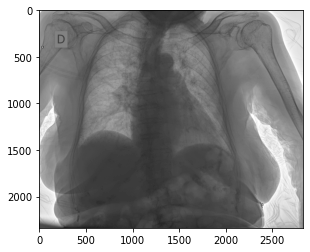

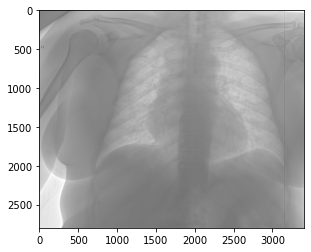

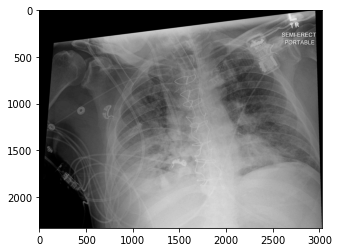

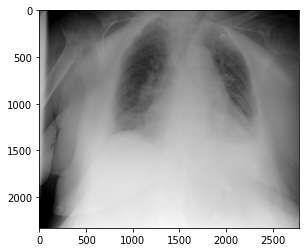

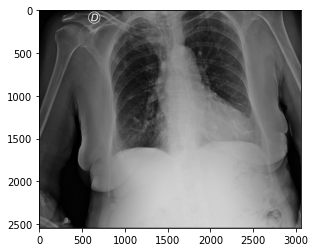

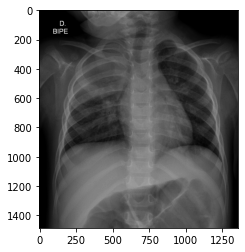

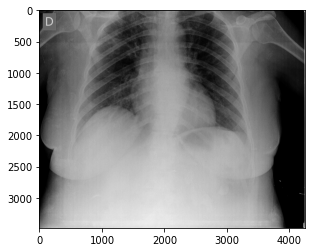

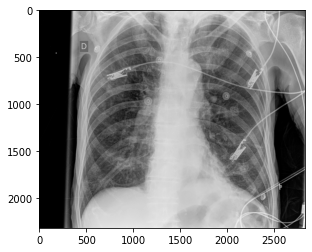

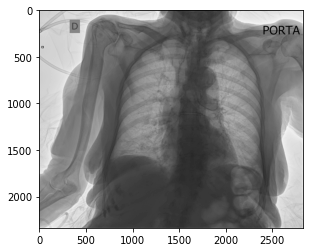

In [ ]:
import time
for image in training_output:
    plt.clf()
    plt.cla()
    plt.close()
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()

In [ ]:
# fpath = get_testdata_file('CT_small.dcm')
# ds = dcmread(fpath)

# # Normal mode:
# print()
# print(f"File path........: {fpath}")
# print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
# print()

# pat_name = ds.PatientName
# display_name = pat_name.family_name + ", " + pat_name.given_name
# print(f"Patient's Name...: {display_name}")
# print(f"Patient ID.......: {ds.PatientID}")
# print(f"Modality.........: {ds.Modality}")
# print(f"Study Date.......: {ds.StudyDate}")
# print(f"Image size.......: {ds.Rows} x {ds.Columns}")
# print(f"Pixel Spacing....: {ds.PixelSpacing}")

# # use .get() if not sure the item exists, and want a default value if missing
# print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# # plot the image using matplotlib
# plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
# plt.show()